In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/2nice/.virtualenvs/erstesVE/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


# Erster Import

In [2]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

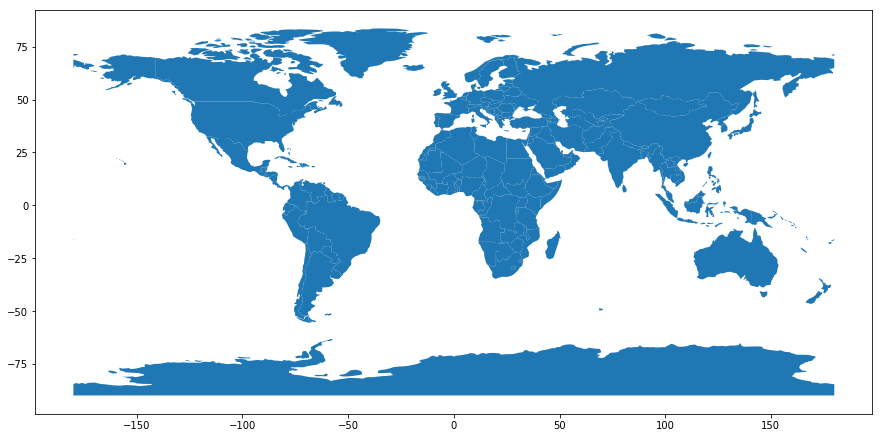

In [3]:
world.plot(figsize=(15,20))

In [4]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [5]:
pd.set_option('display.max_colwidth',50)

In [6]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


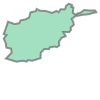

In [7]:
world['geometry'][0]

In [8]:
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000

/Users/2nice/.virtualenvs/erstesVE/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


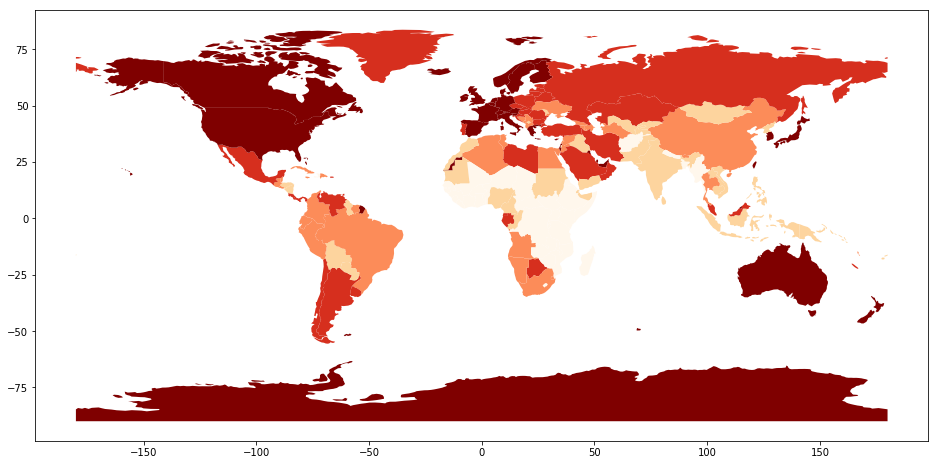

In [9]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));
plt.savefig('welt.pdf')

In [10]:
!ls

01 APIs und Authentifikation (Google API).ipynb
02 Aufgaben Tag 16.ipynb
03 Geopandas.ipynb
03 b +Geopandas.ipynb
GEN_A4_GEMEINDEN_SEEN_2018_F
GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson
Google API_Uebung_Vietnamesisch-Copy1.ipynb
Google API_Uebung_Vietnamesisch.ipynb
SHAPEFILE_LV03_LN02
italrest_allcities.csv
italrest_top10cities.csv
italrests.csv
shapePLZ
switzerland.pdf
test.pdf
welt.pdf


In [11]:
!open "welt.pdf"

In [12]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [13]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510

In [14]:
del ch['sprachcode_']

In [15]:
ch = ch.dropna()

In [16]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


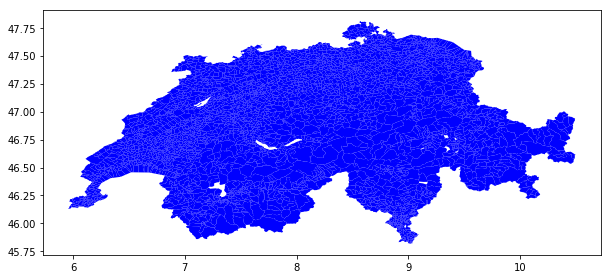

In [17]:
ch.plot(figsize=(10,10), color='blue')
plt.savefig('switzerland.pdf')

In [18]:
df = pd.read_csv('italrest_top10cities.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 6 columns):
Unnamed: 0    1838 non-null int64
Addresse      1838 non-null object
Lat           1838 non-null float64
Lng           1838 non-null float64
Name          1838 non-null object
Rating        1838 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 86.2+ KB


In [20]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3


In [21]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row['Lng'], row['Lat'])
#df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)

In [22]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708)


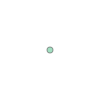

In [23]:
df['Points'][0]

In [24]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points']))
italrests.to_csv('italrests.csv', index=False)

# Karte und Punkte: Was ist hier passiert?

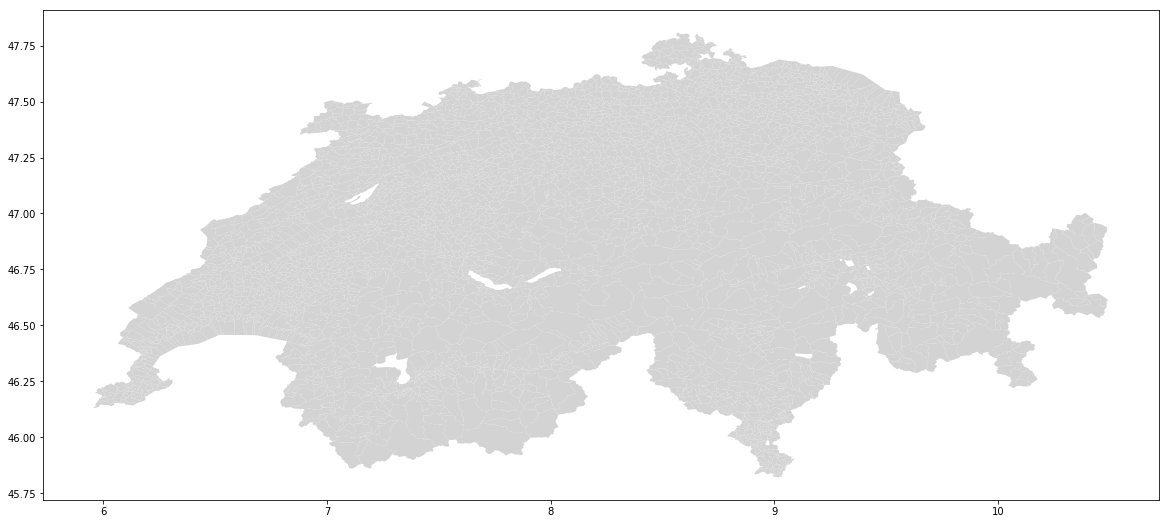

In [25]:
ch.plot(figsize=(20,20), color='lightgrey')

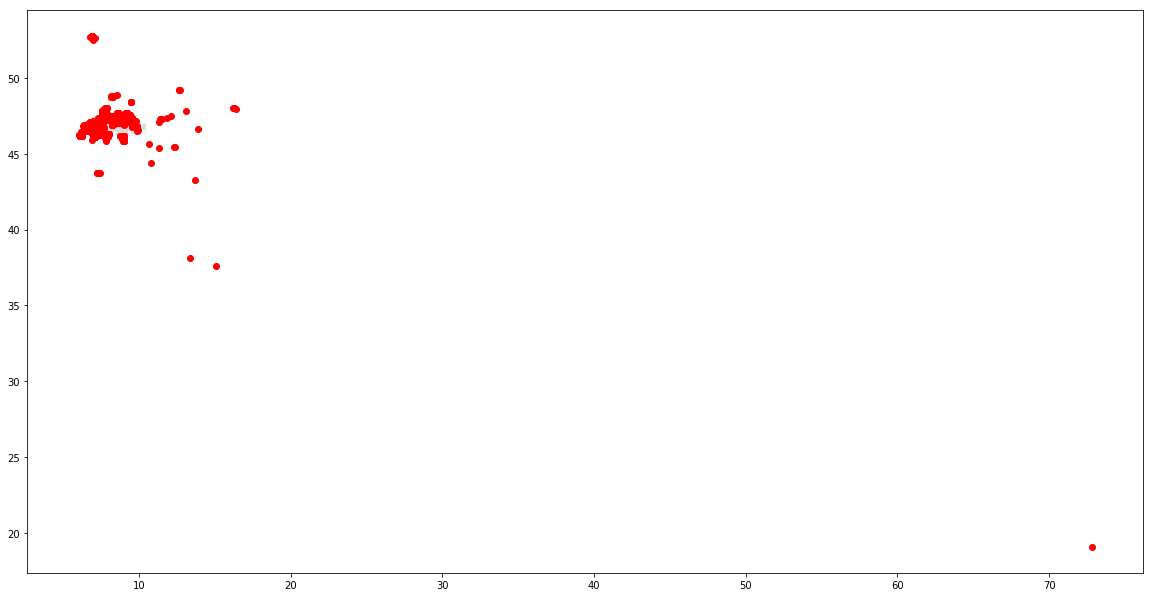

In [26]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
italrests.plot(ax=ax, color='red')

# Schneiden wir die Koordinaten ab

In [27]:
italrests = italrests[italrests['Lat'] < 48]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

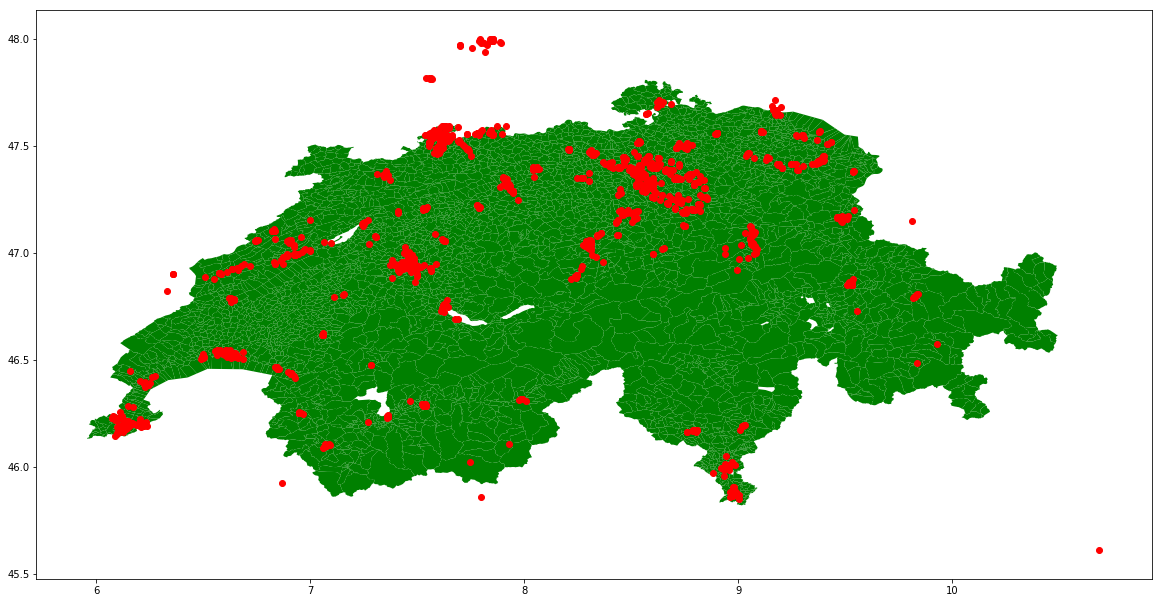

In [28]:
ax = ch.plot(figsize=(20,20), color='green')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [29]:
ch.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [30]:
ch = ch.dropna()

In [31]:
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

In [32]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


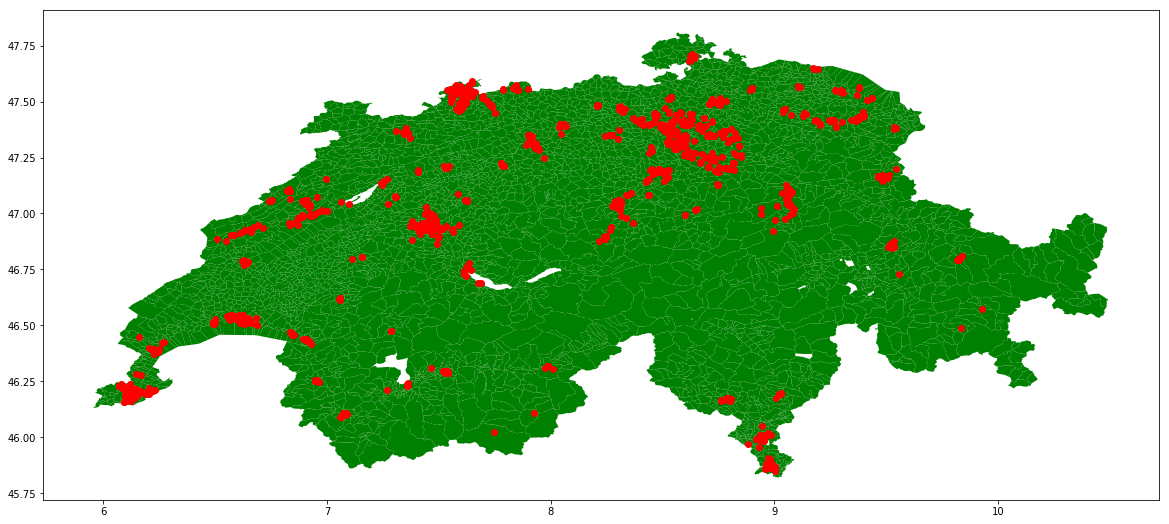

In [33]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red')

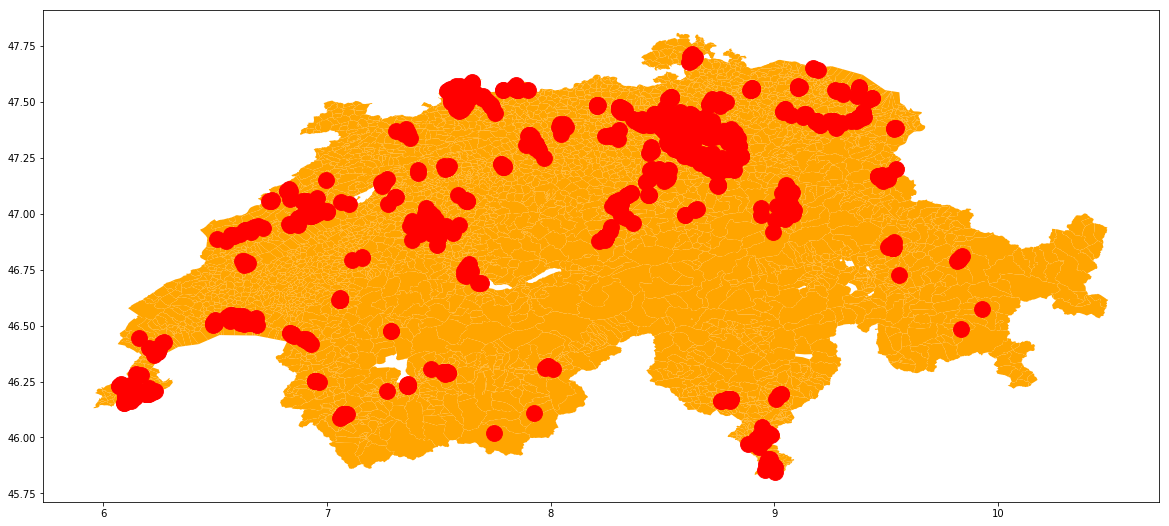

In [34]:
ax = ch.plot(figsize=(20,20), color='orange')
ch_with_italrests.plot(ax=ax, color='red', marker='.', markersize=1000)

# Schauen wir uns Zürich an

In [35]:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F/GEN_A4_GEMEINDEN_2018_F.shp")

In [36]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [37]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

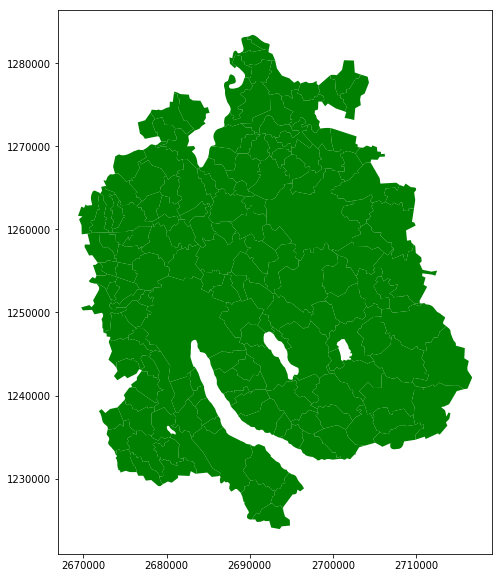

In [38]:
zh.plot(figsize=(10,10), color='green')

# Warum kommen hier keine Punkte vor?

In [39]:
# Das hat mit dem Sonderfall Schweiz zu tun.
0# https://github.com/ValentinMinder/Swisstopo-WGS84-LV03

0

In [40]:
# Frage: Wir könnten wir damit unsere Koordinaten umwandeln?

In [41]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [42]:
pd.set_option('display.max_colwidth', -1)

In [43]:
zh.head()

,BFS,NAME,BEZIRKSNAM,ART_TEXT,ART_CODE,SHAPE_Leng,SHAPE_Area,geometry
0,86,Dielsdorf,Dielsdorf,Gemeinde,1,12046.396046,5.616486e+06,"POLYGON ((2678233.626499999 1260372.840800002, 2677783.1021 1259148.008199997, 2677979.662 1258468.123899996, 2677503.2128 1258157.942100003, 2677001.521400001 1257725.542300001, 2676981.368999999 1257962.020300001, 2676663.453699999 1257583.216200002, 2676519.743700001 1258040.601800002, 2675138.976399999 1257887.7443, 2674691.136999998 1258082.452600002, 2675412.7139 1259120.479099996, 2675493.108399998 1258637.191100001, 2675758.547800001 1259231.7852, 2675973.173799999 1259214.568899997, 2675937.7797 1259846.983599998, 2676735.502099998 1260384.241400003, 2678233.626499999 1260372.840800002))"
1,213,Brütten,Winterthur,Gemeinde,1,11342.209841,6.556066e+06,"POLYGON ((2692447.137800001 1260564.256300002, 2692698.864700001 1260004.985299997, 2693111.2234 1259842.932499997, 2693611.893100001 1260377.3851, 2695069.6149 1258597.703100003, 2694737.805199999 1258256.310999997, 2693841.002500001 1258177.647799999, 2693102.016100001 1257443.093500003, 2691517.694200002 1258564.208099999, 2691760.0108 1259013.257600002, 2691476.0962 1260312.573600002, 2692061.012600001 1260624.439199999, 2692447.137800001 1260564.256300002))"
2,226,Schlatt (ZH),Winterthur,Gemeinde,1,15513.841928,8.844313e+06,"POLYGON ((2704655.376800001 1260245.353200004, 2704684.171700001 1259869.073100001, 2704932.742199998 1259648.038699999, 2705849.642000001 1259605.624600001, 2705700.9375 1259285.110200003, 2706663.8638 1258375.142499998, 2707042.120499998 1258480.824000001, 2707002.8849 1257944.344899997, 2707293.7172 1257718.926100001, 2707125.619800001 1257508.806900002, 2706608.346099999 1256874.787299998, 2706207.2564 1257183.737300001, 2706200.999400001 1257189.065499999, 2705436.318399999 1257840.225199997, 2704718.262899999 1257571.783399999, 2704183.7311 1257956.065499999, 2702558.904399998 1257998.196999997, 2702510.732099999 1258418.972900003, 2702295.3103 1258474.383400001, 2702315.766800001 1258991.537500001, 2703323.421500001 1259383.965999998, 2703307.1483 1259773.129199997, 2703027.214000002 1259968.340899996, 2703082.1303 1260179.4723, 2703297.552299999 1260124.061800003, 2703314.904599998 1260296.545599997, 2704081.7366 1260756.909000002, 2704655.376800001 1260245.353200004))"
3,90,Niederhasli,Dielsdorf,Gemeinde,1,19476.372746,1.148451e+07,"POLYGON ((2679283.133200001 1260344.441399999, 2679679.340399999 1260558.794200003, 2680047.033100002 1259764.466499999, 2679908.841400001 1259288.587800004, 2680270.693599999 1259094.413699999, 2680667.630100001 1257970.399300002, 2680913.5814 1257991.771799996, 2681099.448899999 1257725.899400003, 2681495.059500001 1257920.662600003, 2681409.706500001 1258232.055799998, 2681692.247099999 1258374.813000001, 2681845.096500002 1257649.926899999, 2681247.851100001 1257421.457699999, 2681232.892200001 1257045.4331, 2680873.601500001 1256997.5361, 2680815.337200001 1256538.291199997, 2680190.375500001 1255946.422600001, 2680150.777199998 1255512.833800003, 2679739.580899999 1255598.2535, 2679760.513999999 1256006.187100001, 2679286.582699999 1256651.6756, 2679137.328699999 1256440.064099997, 2678998.069600001 1256477.011799999, 2679018.530000001 1256929.535899997, 2677904.581999999 1257212.3653, 2677325.664299998 1257041.403200001, 2677266.634 1257251.100400001, 2677031.821899999 1257369.990099996, 2677001.521400001 1257725.542300001, 2677503.2128 1258157.942100003, 2677979.662 1258468.123899996, 2677783.1021 1259148.008199997, 2678233.626499999 1260372.840800002, 2678262.726500001 1260641.174099997, 2678433.609499998 1260617.255800001, 2678442.847399998 1260304.6074, 2678600.4945 1260344.387800001, 2678623.512600001 1260587.134400003, 2679044.644099999 1260840.016099997, 2679283.133200001 1260344.441399999))"
4,63,Lufingen,Bülach,Gemeinde,1,9651.800965,4.841958e+06,"POLYGON ((2687672.1384 1260794.119199999, 2687812.100200001 1260680.714500003, 2688002.557599999 1260574.190099999, 2

In [44]:
italrests

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points,geometry
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055),POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001),POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525),POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999),POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708),POINT (8.529277699999998 47.3763708)
5,5,"Luisenstrasse 40, 8005 Zürich, Switzerland",47.384228,8.530403,Cucina,4.2,POINT (8.530403 47.384228),POINT (8.530403 47.384228)
6,6,"Ohmstrasse 11, 8050 Zürich, Switzerland",47.410185,8.545875,Concerto,4.2,POINT (8.545874999999999 47.41018520000001),POINT (8.545874999999999 47.41018520000001)
7,7,"Stampfenbachstrasse 8, 8001 Zürich, Switzerland",47.377759,8.543813,Commihalle,4.1,POINT (8.543813 47.377759),POINT (8.543813 47.377759)
8,8,"Niederdorfstrasse 33, 8001 Zürich, Switzerland",47.374671,8.543708,Tre Cucine,3.8,POINT (8.543707800000002 47.3746714),POINT (8.543707800000002 47.3746714)
9,9,"Waaggasse 5/7, 8001 Zürich, Switzerland",47.370103,8.539890,Santa Lucia,4.1,POINT (8.539889500000001 47.3701028),POINT (8.539889500000001 47.3701028)


# Warum kommen hier keine Punkte vor?

### Das hat mit dem Sonderfall Schweiz zu tun.
0# https://github.com/ValentinMinder/Swisstopo-WGS84-LV03

### Frage: Wir könnten wir damit unsere Koordinaten umwandeln?

Lösung: siehe Notebook Umwandlung WGS84 <-> LV03

# Ein einfacher Work Around

In [45]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [46]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

/Users/2nice/.virtualenvs/erstesVE/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


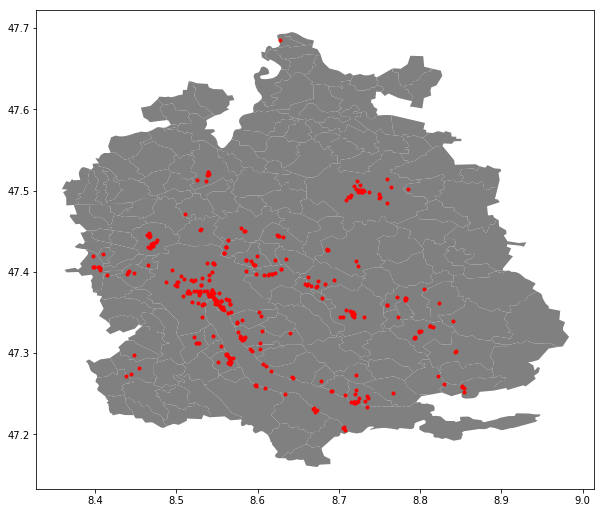

In [47]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".")